In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report



In [3]:
df = pd.read_csv("weatherHistory.csv")
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [4]:
print(df['Formatted Date'].dtypes) 
df['Formatted Date'] = df['Formatted Date'].str.split(' ').str[0]
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], errors='coerce').dt.tz_localize(None)
print(df['Formatted Date'].dtypes) 
print(df['Formatted Date'].head()) 

object
datetime64[ns]
0   2006-04-01
1   2006-04-01
2   2006-04-01
3   2006-04-01
4   2006-04-01
Name: Formatted Date, dtype: datetime64[ns]


In [5]:
df['Day of Year'] = df['Formatted Date'].dt.dayofyear
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Day of Year
0,2006-04-01,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,91
1,2006-04-01,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,91
2,2006-04-01,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,91
3,2006-04-01,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,91
4,2006-04-01,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,253
96449,2016-09-09,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,253
96450,2016-09-09,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,253
96451,2016-09-09,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,253


In [6]:
daily_avg_temp = df.groupby('Day of Year')['Temperature (C)'].mean().reset_index()
daily_avg_temp.columns = ['Day of Year', 'Average Temperature (C)']
daily_avg_temp

,Day of Year,Average Temperature (C)
0,1,-1.211048
1,2,-0.310606
2,3,-0.437689
3,4,-0.755240
4,5,0.451999
...,...,...
361,362,-0.676768
362,363,-0.765236
363,364,-1.586974
364,365,-1.938952


In [7]:
X = daily_avg_temp['Day of Year'].values
Y = daily_avg_temp['Average Temperature (C)'].values

X = X.reshape(-1,1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=42)
x_test, x_validation, y_test, y_validation = train_test_split(x_test, y_test, test_size=.25, random_state=42)

x_train = x_train.reshape(-1, 1)
x_validation = x_validation.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation='linear'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mae',
)



history = model.fit(x_train, y_train, epochs=300)


Epoch 1/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 12.3054
Epoch 2/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.3481 
Epoch 3/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.5842 
Epoch 4/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.5468
Epoch 5/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.1625 
Epoch 6/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.5668 
Epoch 7/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.2229 
Epoch 8/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.9394 
Epoch 9/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.5666 
Epoch 10/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.3631 
Epoch 11/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.1660 
Epoch 12/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.5730 
Epoch 13/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.5584 
Epoch 14/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.9984 
Epoch 15/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6m

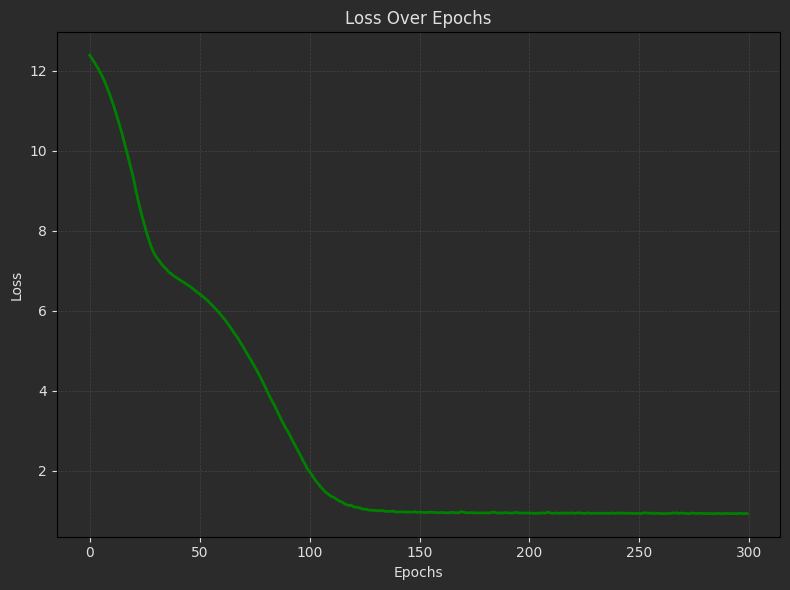

In [26]:
fig, ax = plt.subplots(figsize=(8, 6)) 
fig.patch.set_facecolor('#2b2b2b')  

ax.plot(history.history['loss'], color='green', linewidth=2)
ax.set_title("Loss Over Epochs", color='#e0e0e0')
ax.set_xlabel("Epochs", color='#e0e0e0')
ax.set_ylabel("Loss", color='#e0e0e0')
ax.tick_params(colors='#e0e0e0')
ax.grid(color='#555555', linestyle='--', linewidth=0.5, alpha=0.6)
ax.set_facecolor('#2b2b2b') 

plt.tight_layout()
plt.show()


In [29]:
test_result = model.evaluate(x_validation, y_validation)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.7419


In [28]:
model.save('models.h5')